# Recognizing Gender from voice using SVM

The aim of this project is to classify the sound as male or female depending upon various parameters of sound by using Support Vector Machine. The following constitutes the general flow of the project.

<h4>Project Flow</h4>
<ol>
    <li>Load the Dataset</li>
    <li>EDA</li>
    <li>Null Value Check</li>
    <li>Performing One hot encoding</li>
    <li>Splitting the data</li>
    <li>Scaling the data</li>
    <li>Feature Selection</li>
    <li>Building the model</li>
    <li>Model Fitting</li>
    <li>Hyperparameter tuning</li>
    <li>Performance Evaluation</li>
</ol>

### Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

## Load the dataset

In [2]:
df = pd.read_csv('Dataset/voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## EDA

### Displaying the output labels

In [3]:
df_final = df.label.unique()
print(df_final)

['male' 'female']


### Dataset Info

In [4]:
df.shape

(3168, 21)

### Missing Value Check

In [5]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

<AxesSubplot:>

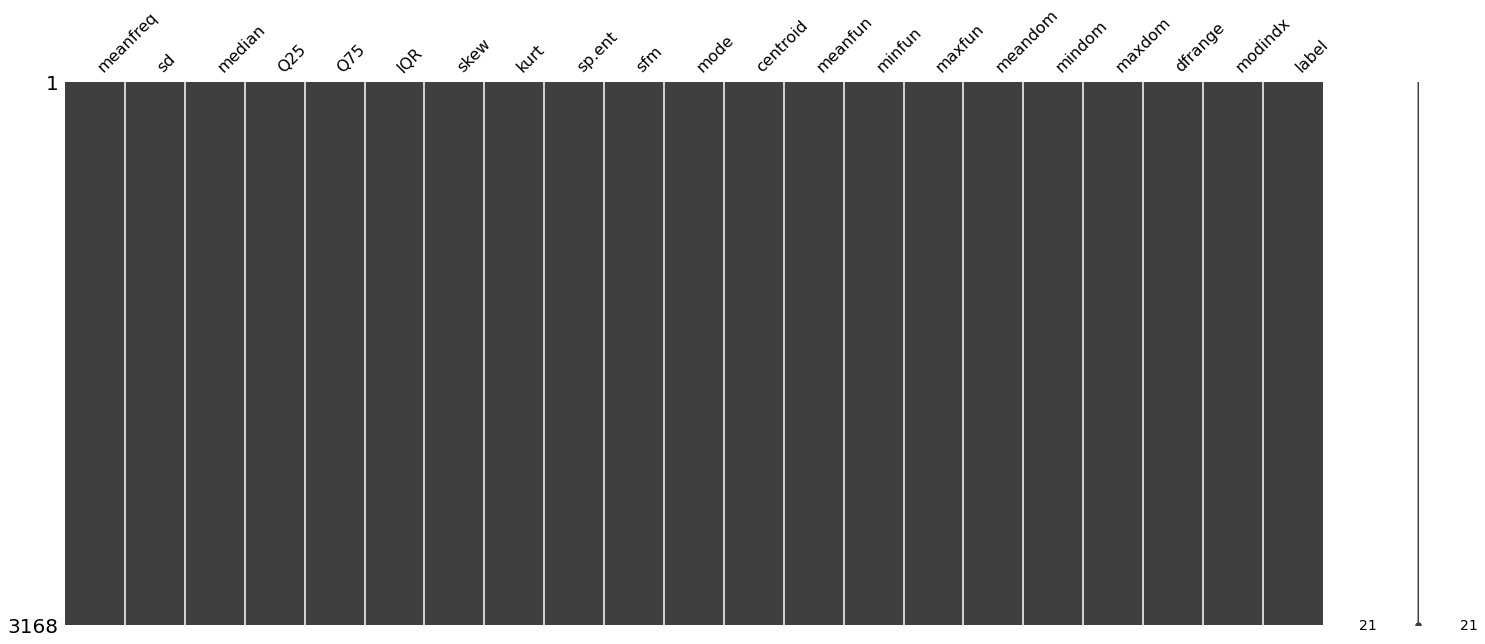

In [6]:
msno.matrix(df)

As it could be observed our dataset is free of any null values. Thereby, we could skip the null value handling and proceed ahead.

### Checking the data types

In [7]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

In [8]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
df[numerical_features].head()

Number of numerical variables:  20


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


It could be inferred that apart from the output feature which is categorical, all other input features are numerical.

In [9]:
for i, value in enumerate(numerical_features):
    print(f'The {value} has {len(df[numerical_features[i]].unique())} unique values')

The meanfreq has 3166 unique values
The sd has 3166 unique values
The median has 3077 unique values
The Q25 has 3103 unique values
The Q75 has 3034 unique values
The IQR has 3073 unique values
The skew has 3166 unique values
The kurt has 3166 unique values
The sp.ent has 3166 unique values
The sfm has 3166 unique values
The mode has 2825 unique values
The centroid has 3166 unique values
The meanfun has 3166 unique values
The minfun has 913 unique values
The maxfun has 123 unique values
The meandom has 2999 unique values
The mindom has 77 unique values
The maxdom has 1054 unique values
The dfrange has 1091 unique values
The modindx has 3079 unique values


So, we can safely say that none of the input numerical features are discrete due to the high number of unique values. So it could be considered as continuous.

In [10]:
numerical_features

['meanfreq',
 'sd',
 'median',
 'Q25',
 'Q75',
 'IQR',
 'skew',
 'kurt',
 'sp.ent',
 'sfm',
 'mode',
 'centroid',
 'meanfun',
 'minfun',
 'maxfun',
 'meandom',
 'mindom',
 'maxdom',
 'dfrange',
 'modindx']

### Visualizing the continuous features

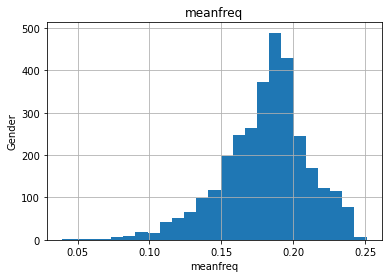

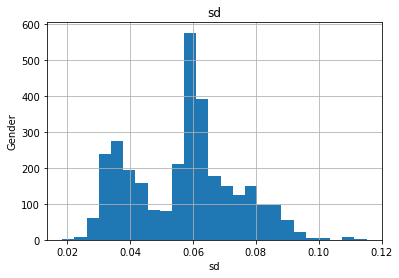

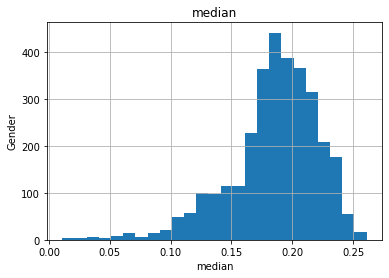

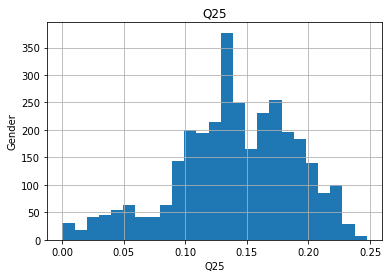

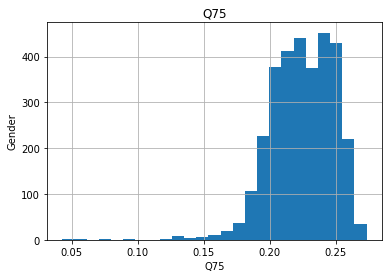

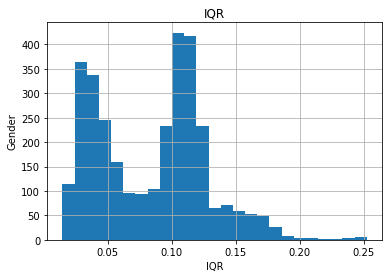

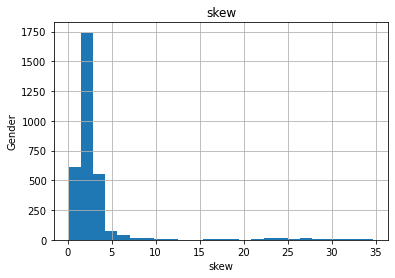

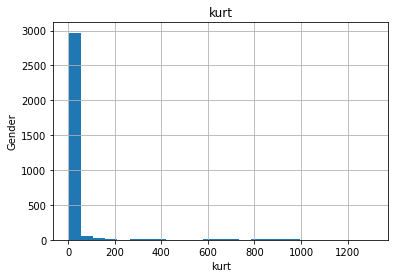

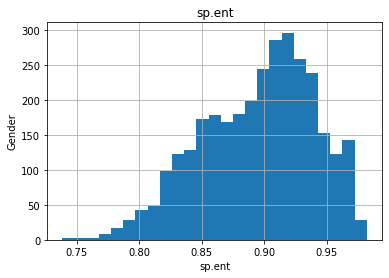

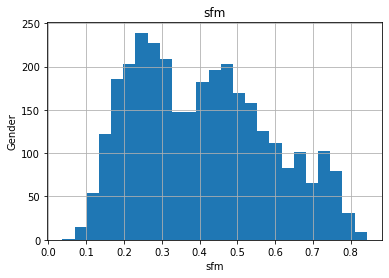

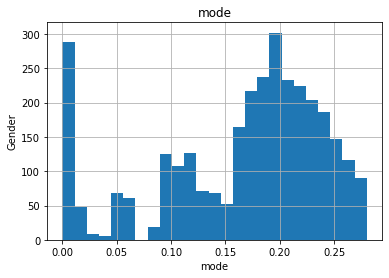

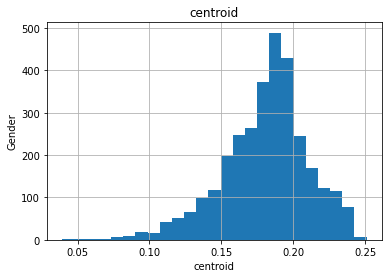

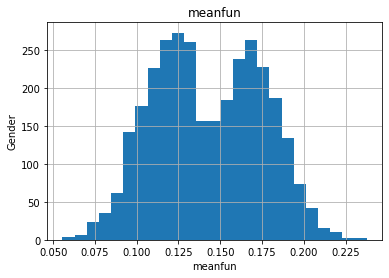

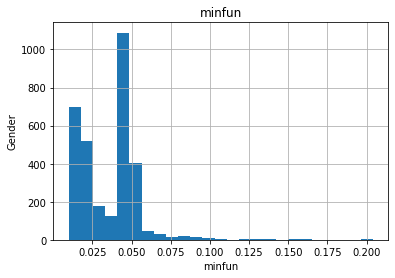

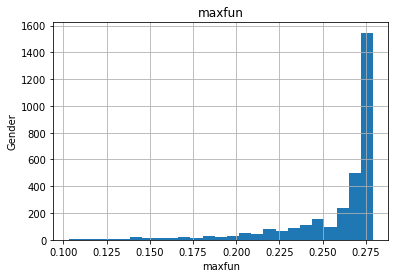

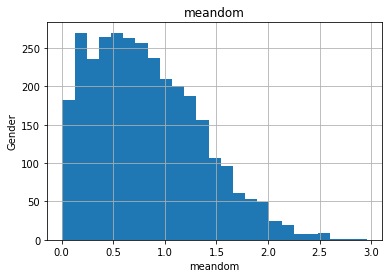

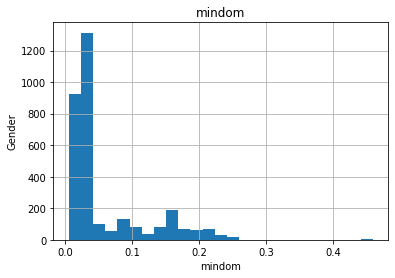

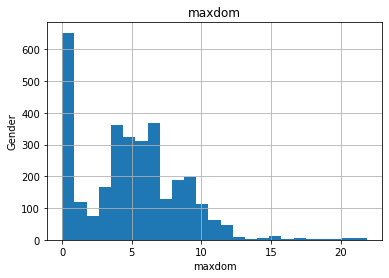

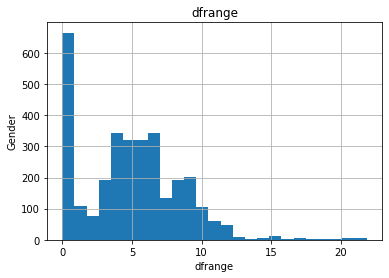

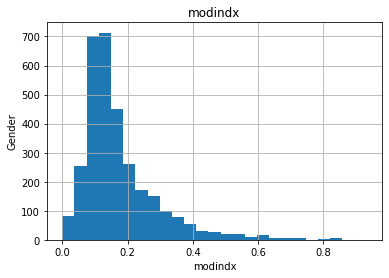

In [11]:
for feature in numerical_features:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Gender")
    plt.title(feature)
    plt.show()

### Outlier distribution check

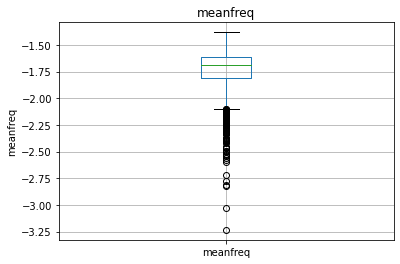

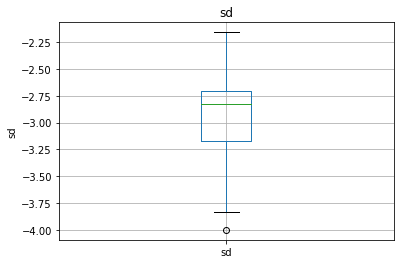

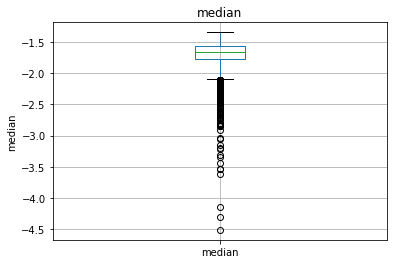

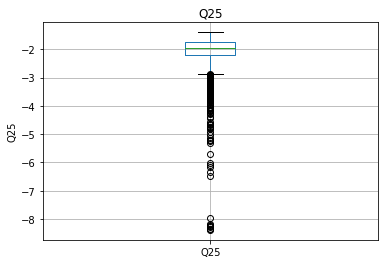

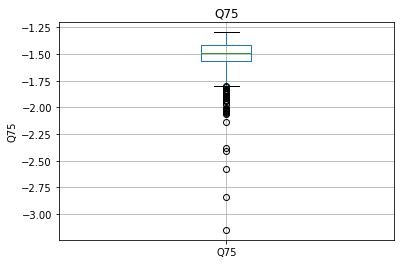

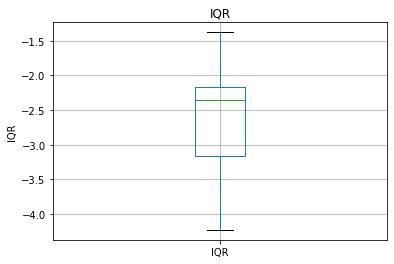

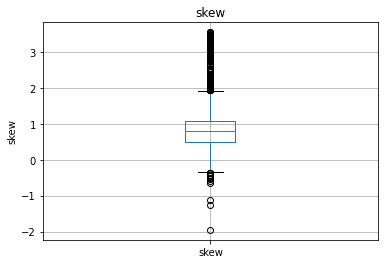

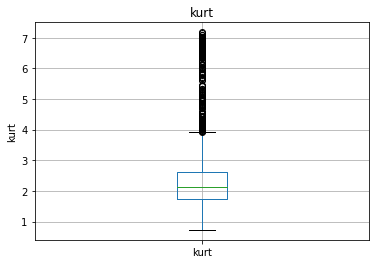

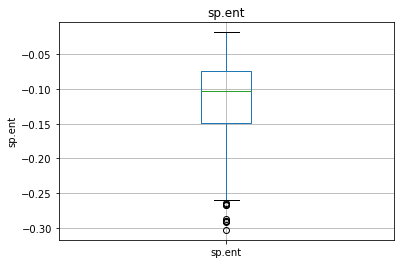

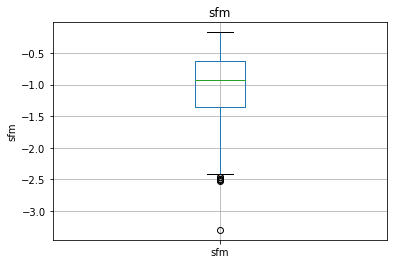

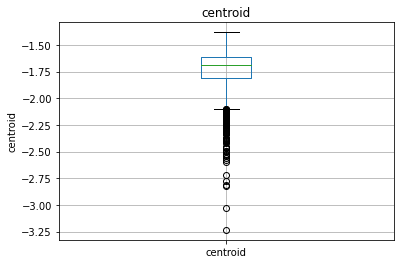

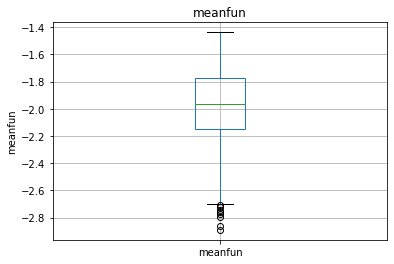

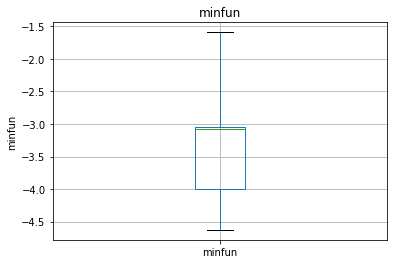

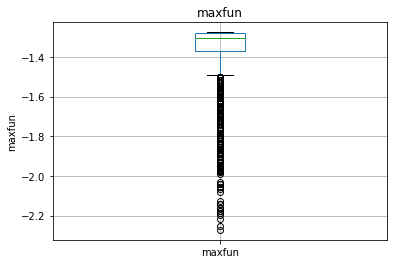

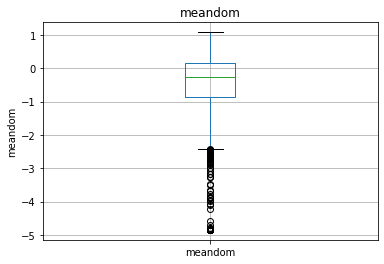

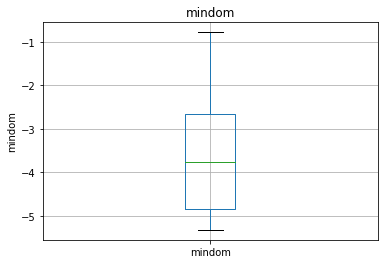

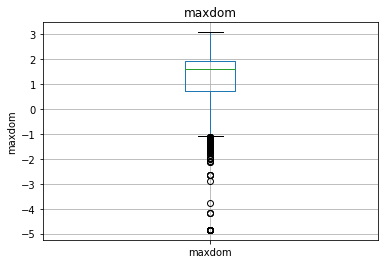

In [12]:
for feature in numerical_features:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

It could be seen that all the features apart from Inter Quanrtile Range (IQR) have outliers.

### Class Distribution check

[Text(0.5, 1.0, 'Distribution of Gender')]

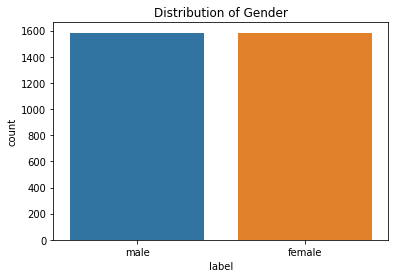

In [13]:
sns.countplot(x = 'label',data = df).set(title = 'Distribution of Gender')

The labels of male and female being equal corresponds to the dataset being free of class imbalance.

## Performing One Hot Encoding

In [14]:
df = pd.get_dummies(df, columns = ['label'])
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label_female,label_male
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,0,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,0,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,0,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,0,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,0,1


In [15]:
df = df.drop('label_female', axis = 1)

We have performed one hot encoding on the output label and dropped one of the features (as male and female have opposite labels).

## Splitting the dataset

In [16]:
X = df.copy()
X = df.drop('label_male', axis = 1)
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [17]:
y = df['label_male']

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
X_train.shape, X_test.shape

((2534, 20), (634, 20))

## Scaling the data

In [20]:
scaler=RobustScaler()
scaler.fit_transform(X_train)

array([[ 0.89550698, -0.80653508,  0.43721545, ...,  1.03262643,
         1.02829426, -0.86322802],
       [-0.96290446,  0.12633097, -1.50610896, ..., -0.21961664,
        -0.228173  ,  1.9114656 ],
       [ 0.1103896 ,  0.13724384, -0.74976318, ...,  0.39641109,
         0.39773646,  0.11329748],
       ...,
       [-1.42619692,  0.91655327, -1.19223684, ..., -0.23327896,
        -0.22635408,  0.12414633],
       [ 1.51000038, -1.19269472,  1.29541324, ...,  0.98858075,
         0.98464026, -0.15313238],
       [ 0.06537992, -1.02133506,  0.02868641, ...,  0.89559543,
         0.89248181, -0.04284794]])

In [21]:
scaler.transform(X_test)

array([[ 0.31322035, -0.86842651,  0.1446907 , ...,  0.50897227,
         0.48504446, -0.4169132 ],
       [-0.14087608,  0.04761466, -0.20911393, ..., -0.09298532,
        -0.087308  , -0.23900357],
       [ 1.06978314, -1.27637773,  0.76613195, ..., -0.18107667,
        -0.21341956, -0.30083228],
       ...,
       [-0.77085314,  0.82310325, -1.04907261, ..., -0.00652529,
         0.00161681, -0.27732613],
       [ 0.65151246, -0.79302377,  0.39216222, ...,  0.77814029,
         0.77607114, -0.54149473],
       [-0.6680153 , -0.22490774, -0.52779303, ..., -0.99449429,
        -1.01030719,  0.2023097 ]])

We have made use of RobustScaler scaling as it is robust to outliers.

## Feature Selection

In [22]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.0005, random_state=0))
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.0005, random_state=0))

In [23]:
selected_feat = X_train.columns[(feature_sel_model.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(X_train.shape[1]-len(selected_feat)))

total features: 20
selected features: 10
features with coefficients shrank to zero: 10


It could be seen that Lasso has brought down our features to 10

## Modifying the train and test data according to selected features

In [24]:
X_train = X_train[selected_feat]

In [25]:
X_train.head()

,Q75,IQR,skew,kurt,sfm,mode,meanfun,minfun,meandom,maxdom
2311,0.246154,0.052308,2.137455,7.951889,0.211434,0.193846,0.174002,0.047856,1.182398,9.937500
349,0.203394,0.103643,2.689374,12.289471,0.510190,0.095655,0.101953,0.051546,0.809617,3.940430
989,0.254003,0.121035,1.870762,6.261814,0.286869,0.141065,0.131446,0.047291,1.801758,6.890625
2100,0.213233,0.043346,2.162641,7.631533,0.237891,0.168839,0.170972,0.015779,0.434211,4.828125
1118,0.239795,0.103385,1.615562,5.302011,0.342237,0.126359,0.134925,0.047714,0.782012,3.281250


In [26]:
X_test = X_test[selected_feat]

In [27]:
X_test.head()

,Q75,IQR,skew,kurt,sfm,mode,meanfun,minfun,meandom,maxdom
2534,0.218835,0.045874,1.730322,5.230177,0.275524,0.173981,0.156238,0.047105,1.265625,7.429688
1436,0.225089,0.091216,1.513972,5.995542,0.447723,0.177439,0.121193,0.047666,0.690589,4.546875
2568,0.236695,0.026102,3.449305,18.060482,0.121375,0.219492,0.203196,0.050104,0.668750,4.125000
3156,0.227872,0.049707,1.585353,4.945634,0.227903,0.176117,0.191704,0.032720,0.593750,5.921875
1473,0.254419,0.080920,1.398761,4.859347,0.221827,0.264686,0.110204,0.017003,0.710677,5.476562


## Building and fitting the model

In [28]:
svc_clf = SVC() 
svc_clf.fit(X_train,y_train)
y_pred = svc_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of SVM Classifier : %.2f" % (accuracy*100) )
print("F1 Score", f1_score(y_test, y_pred, average='weighted'))
# print(classification_report(y_test, y_pred))

Accuracy of SVM Classifier : 67.19
F1 Score 0.6659417883620036


It can be seen that the performance considering the default values of SVM is quite low. So let's tune some parameters

## Parameter tuning with GridSearch

In [29]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear','sigmoid']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 4, cv=8, scoring = 'accuracy')
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 8 folds for each of 75 candidates, totalling 600 fits
[CV 1/8] END ........C=0.1, gamma=1, kernel=rbf;, score=0.707 total time=   0.2s
[CV 2/8] END ........C=0.1, gamma=1, kernel=rbf;, score=0.662 total time=   0.3s
[CV 3/8] END ........C=0.1, gamma=1, kernel=rbf;, score=0.700 total time=   0.2s
[CV 4/8] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.2s
[CV 5/8] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.2s
[CV 6/8] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.2s
[CV 7/8] END ........C=0.1, gamma=1, kernel=rbf;, score=0.655 total time=   0.2s
[CV 8/8] END ........C=0.1, gamma=1, kernel=rbf;, score=0.677 total time=   0.2s
[CV 1/8] END .....C=0.1, gamma=1, kernel=linear;, score=0.804 total time=   0.3s
[CV 2/8] END .....C=0.1, gamma=1, kernel=linear;, score=0.814 total time=   0.3s
[CV 3/8] END .....C=0.1, gamma=1, kernel=linear;, score=0.798 total time=   0.2s
[CV 4/8] END .....C=0.1, gamma=1, kernel=linear

[CV 6/8] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.533 total time=   0.3s
[CV 7/8] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.535 total time=   0.2s
[CV 8/8] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.516 total time=   0.1s
[CV 1/8] END C=0.1, gamma=0.0001, kernel=linear;, score=0.804 total time=   0.3s
[CV 2/8] END C=0.1, gamma=0.0001, kernel=linear;, score=0.814 total time=   0.3s
[CV 3/8] END C=0.1, gamma=0.0001, kernel=linear;, score=0.798 total time=   0.3s
[CV 4/8] END C=0.1, gamma=0.0001, kernel=linear;, score=0.798 total time=   0.3s
[CV 5/8] END C=0.1, gamma=0.0001, kernel=linear;, score=0.754 total time=   0.5s
[CV 6/8] END C=0.1, gamma=0.0001, kernel=linear;, score=0.811 total time=   0.3s
[CV 7/8] END C=0.1, gamma=0.0001, kernel=linear;, score=0.788 total time=   0.3s
[CV 8/8] END C=0.1, gamma=0.0001, kernel=linear;, score=0.766 total time=   0.2s
[CV 1/8] END C=0.1, gamma=0.0001, kernel=sigmoid;, score=0.404 total time=   0.1s
[CV 2/8] END C=0.1, gamma=0

[CV 4/8] END ...C=1, gamma=0.001, kernel=linear;, score=0.931 total time=   3.0s
[CV 5/8] END ...C=1, gamma=0.001, kernel=linear;, score=0.915 total time=   4.1s
[CV 6/8] END ...C=1, gamma=0.001, kernel=linear;, score=0.934 total time=   2.6s
[CV 7/8] END ...C=1, gamma=0.001, kernel=linear;, score=0.924 total time=   5.2s
[CV 8/8] END ...C=1, gamma=0.001, kernel=linear;, score=0.927 total time=   3.0s
[CV 1/8] END ..C=1, gamma=0.001, kernel=sigmoid;, score=0.539 total time=   0.0s
[CV 2/8] END ..C=1, gamma=0.001, kernel=sigmoid;, score=0.464 total time=   0.0s
[CV 3/8] END ..C=1, gamma=0.001, kernel=sigmoid;, score=0.442 total time=   0.0s
[CV 4/8] END ..C=1, gamma=0.001, kernel=sigmoid;, score=0.508 total time=   0.0s
[CV 5/8] END ..C=1, gamma=0.001, kernel=sigmoid;, score=0.508 total time=   0.0s
[CV 6/8] END ..C=1, gamma=0.001, kernel=sigmoid;, score=0.568 total time=   0.1s
[CV 7/8] END ..C=1, gamma=0.001, kernel=sigmoid;, score=0.481 total time=   0.0s
[CV 8/8] END ..C=1, gamma=0.

[CV 2/8] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.353 total time=   0.1s
[CV 3/8] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.347 total time=   0.0s
[CV 4/8] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.388 total time=   0.1s
[CV 5/8] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.366 total time=   0.0s
[CV 6/8] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.369 total time=   0.1s
[CV 7/8] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.370 total time=   0.0s
[CV 8/8] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.630 total time=   0.0s
[CV 1/8] END .....C=10, gamma=0.001, kernel=rbf;, score=0.763 total time=   0.1s
[CV 2/8] END .....C=10, gamma=0.001, kernel=rbf;, score=0.748 total time=   0.1s
[CV 3/8] END .....C=10, gamma=0.001, kernel=rbf;, score=0.757 total time=   0.1s
[CV 4/8] END .....C=10, gamma=0.001, kernel=rbf;, score=0.741 total time=   0.1s
[CV 5/8] END .....C=10, gamma=0.001, kernel=rbf;, score=0.703 total time=   0.1s
[CV 6/8] END .....C=10, gamm

[CV 8/8] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.402 total time=   0.1s
[CV 1/8] END .....C=100, gamma=0.01, kernel=rbf;, score=0.950 total time=   0.1s
[CV 2/8] END .....C=100, gamma=0.01, kernel=rbf;, score=0.924 total time=   0.2s
[CV 3/8] END .....C=100, gamma=0.01, kernel=rbf;, score=0.909 total time=   0.1s
[CV 4/8] END .....C=100, gamma=0.01, kernel=rbf;, score=0.912 total time=   0.1s
[CV 5/8] END .....C=100, gamma=0.01, kernel=rbf;, score=0.915 total time=   0.1s
[CV 6/8] END .....C=100, gamma=0.01, kernel=rbf;, score=0.915 total time=   0.1s
[CV 7/8] END .....C=100, gamma=0.01, kernel=rbf;, score=0.930 total time=   0.1s
[CV 8/8] END .....C=100, gamma=0.01, kernel=rbf;, score=0.908 total time=   0.1s
[CV 1/8] END ..C=100, gamma=0.01, kernel=linear;, score=0.978 total time=  17.8s
[CV 2/8] END ..C=100, gamma=0.01, kernel=linear;, score=0.978 total time=  30.6s
[CV 3/8] END ..C=100, gamma=0.01, kernel=linear;, score=0.946 total time= 1.1min
[CV 4/8] END ..C=100, gamma=

[CV 6/8] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.912 total time=   0.5s
[CV 7/8] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.921 total time=   0.6s
[CV 8/8] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.877 total time=   0.5s
[CV 1/8] END ..C=1000, gamma=0.1, kernel=linear;, score=0.972 total time=  34.8s
[CV 2/8] END ..C=1000, gamma=0.1, kernel=linear;, score=0.972 total time=  43.1s
[CV 3/8] END ..C=1000, gamma=0.1, kernel=linear;, score=0.943 total time= 1.4min
[CV 4/8] END ..C=1000, gamma=0.1, kernel=linear;, score=0.956 total time=  56.6s
[CV 5/8] END ..C=1000, gamma=0.1, kernel=linear;, score=0.946 total time=  39.0s
[CV 6/8] END ..C=1000, gamma=0.1, kernel=linear;, score=0.965 total time=  20.4s
[CV 7/8] END ..C=1000, gamma=0.1, kernel=linear;, score=0.968 total time=  53.3s
[CV 8/8] END ..C=1000, gamma=0.1, kernel=linear;, score=0.949 total time=  40.9s
[CV 1/8] END .C=1000, gamma=0.1, kernel=sigmoid;, score=0.369 total time=   0.0s
[CV 2/8] END .C=1000, gamma=

GridSearchCV(cv=8, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'sigmoid']},
             scoring='accuracy', verbose=4)

## Displaying the best parameters

In [30]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'linear'}
SVC(C=10, gamma=1, kernel='linear')


In [34]:
accuracy = grid.best_score_
print(accuracy)

0.9796185061693887


In [32]:
from itertools import product
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10,10))
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    cm1 = cm
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] 
        thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, str(cm1[i, j])+ " ("+ str(cm[i, j]*100)+"%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

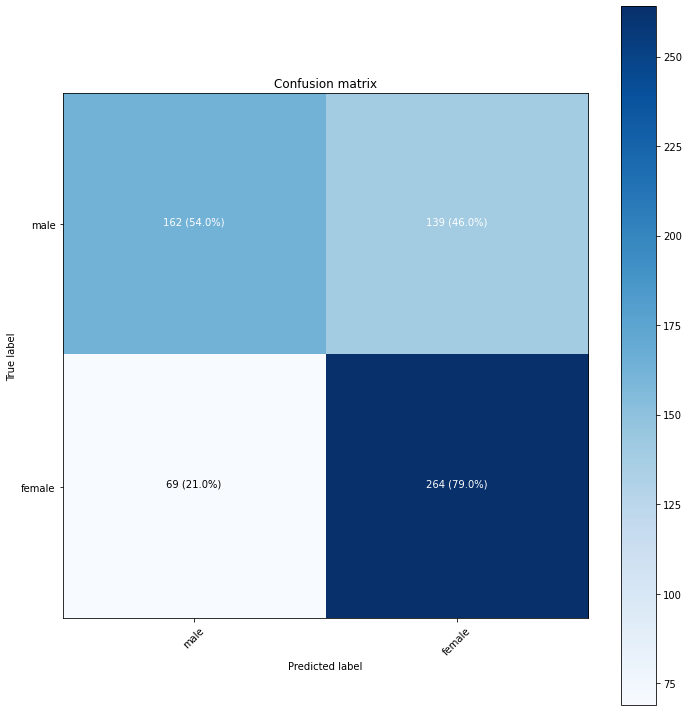

In [33]:
confusion_mtx = confusion_matrix(y_test, y_pred) 
plot_confusion_matrix(confusion_mtx, classes = [df_final[0], df_final[1]])